<a href="https://colab.research.google.com/github/mazzette97/Fake-and-real-news-detection-ML/blob/main/Fake_and_real_news_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project I propose a machine learning model attemps to distinguish
fake and real news into "https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset" dataset

Set of instruction to import kaggle dataset and create a new dataset made by both with a label to identify them

In [2]:
!pip install kaggle --quiet  # Install kaggle if not previously installed

# Need to download kaggle.json token and choose the file during the execution
from google.colab import files
files.upload()  # Choose the kaggle.json token

!mkdir -p ~/.kaggle   #Create an hidden temp folder

!cp kaggle.json ~/.kaggle/  # Copy kaggle.json to the destination folder

!chmod 600 ~/.kaggle/kaggle.json # Set the permissions into (only read mode)

# Download dataset
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

!mkdir -p /content/kaggle/input/ # Create a folder to put the download inside it

# Extract the downloaded file into a destination folder
!unzip -q fake-and-real-news-dataset.zip -d /content/kaggle/input/
# Extract both datasets zip
!unzip -q Fake.csv.zip -d /content/kaggle/input/
!unzip -q True.csv.zip -d /content/kaggle/input/

#Delete zip folders
!rm fake-and-real-news-dataset
!rm Fake.csv.zip
!rm True.csv.zip

# Check if the datasets were downloaded and copied correctly
!ls /content/kaggle/input/fake-and-real-news-dataset

import pandas as pd

# Read both datasets
fake_news = pd.read_csv('/content/kaggle/input/Fake.csv')
real_news = pd.read_csv('/content/kaggle/input/True.csv')

# Print first both datasets (n) lines, default = 5 lines
print("\n ❌ FAKE NEWS SAMPLE:")
display(fake_news.head())

print("\n ✅ REAL NEWS SAMPLE:")
display(real_news.head())

# Check number of rows and coloumn in both datasets
print("\nFAKE shape:", fake_news.shape)
print("REAL shape:", real_news.shape)
# Check type of data by coloumn
print("FAKE columns:", fake_news.columns.tolist())
print("REAL columns:", real_news.columns.tolist())


# Make a unified dataset adding a label for distinguish them
fake_news['label'] = 'FAKE'
real_news['label'] = 'REAL'

news_data = pd.concat([fake_news, real_news], ignore_index=True)

# Print Unified Dataset (n) lines, default = 5 lines
print("\n  ❌✅ Dataset unificato:")
display(news_data.sample(5))

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/41.0M [00:00<?, ?B/s]
100% 41.0M/41.0M [00:00<00:00, 1.44GB/s]
unzip:  cannot find or open Fake.csv.zip, Fake.csv.zip.zip or Fake.csv.zip.ZIP.
unzip:  cannot find or open True.csv.zip, True.csv.zip.zip or True.csv.zip.ZIP.
rm: cannot remove 'fake-and-real-news-dataset': No such file or directory
rm: cannot remove 'Fake.csv.zip': No such file or directory
rm: cannot remove 'True.csv.zip': No such file or directory
ls: cannot access '/content/kaggle/input/fake-and-real-news-dataset': No such file or directory

 ❌ FAKE NEWS SAMPLE:


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"



 ✅ REAL NEWS SAMPLE:


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"



FAKE shape: (23481, 4)
REAL shape: (21417, 4)
FAKE columns: ['title', 'text', 'subject', 'date']
REAL columns: ['title', 'text', 'subject', 'date']

  ❌✅ Dataset unificato:


,title,text,subject,date,label
35642,Austria's conservatives reach coalition deal w...,VIENNA (Reuters) - Austria s conservative Peop...,worldnews,"December 15, 2017",REAL
25231,"Liberal, conservative lawmakers offer opposing...",WASHINGTON (Reuters) - U.S. senators unveiled ...,politicsNews,"September 13, 2017",REAL
38156,China says 'friendly policy' toward Zimbabwe w...,BEIJING (Reuters) - China said on Thursday its...,worldnews,"November 16, 2017",REAL
10737,KATHY GRIFFIN Gets Very Bad News from CNN Afte...,"YOU RE FIRED! Yes, CNN has fired Kathy Griffin...",politics,"May 31, 2017",FAKE
31820,California lawmakers pass rape bill inspired b...,"LOS ANGELES (Reuters) - California lawmakers,...",politicsNews,"August 29, 2016",REAL


Set of instruction to clean the text about stopwords, capslock letter, numbers and symbols and generate wordcloud to visualize the most common words in each case.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


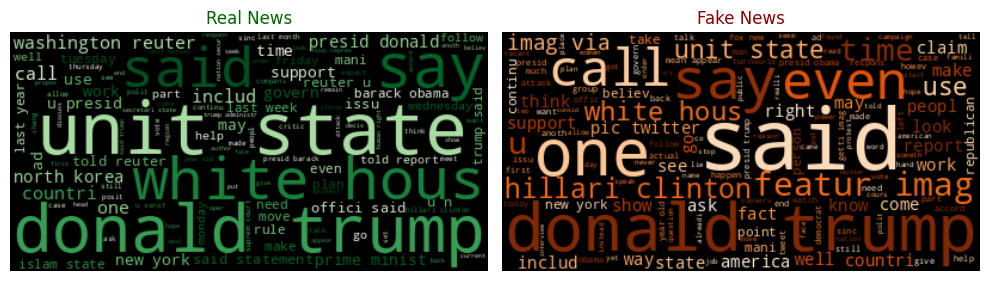

In [4]:
import nltk
import re  # Regular expressions
from nltk.corpus import stopwords  # Stopwords (common words not useful for analysis)
from nltk.stem.porter import PorterStemmer  # Stemming to remove stopwords
import matplotlib.pyplot as plt

nltk.download('stopwords')  # Download a dataset of stopwords "just to be safe to remove all correctly" controllare quest'ultima cosa

stemmer = PorterStemmer() # Initialize stemmer
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Remove capslock letters
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove numbers and symbols
    words = text.split()  # Divide the text into a set of words
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # Remove stopwords and make stemming
    return ' '.join(words)

news_data['stopword_less_text'] = news_data['text'].apply(preprocess_text)

from wordcloud import WordCloud

# Get true and false news, filtering out empty processed text
TRUE_words = news_data[(news_data['label']=='REAL') & (news_data['stopword_less_text'].str.strip() != '')]['stopword_less_text']
FAKE_words = news_data[(news_data['label']=='FAKE') & (news_data['stopword_less_text'].str.strip() != '')]['stopword_less_text']


# Create word clouds for positive and negative reviews
# Check if there are words to generate word clouds before proceeding
if len(TRUE_words) > 0:
  true_wordcloud = WordCloud(colormap='Greens').generate(' '.join(TRUE_words))
  # Plot word clouds
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(true_wordcloud, interpolation='bilinear')
  plt.title('Real News', color='darkgreen')
  plt.axis('off')
else:
  print("There aren't enough words to generate REAL news wordscloud.")

if len(FAKE_words) > 0:
  fake_wordcloud = WordCloud(colormap='Oranges').generate(' '.join(FAKE_words))
  plt.subplot(1, 2, 2)
  plt.imshow(fake_wordcloud, interpolation='bilinear')
  plt.title('Fake News', color='darkred')
  plt.axis('off')
else:
    print("There aren't enough words to generate FAKE news wordscloud.")

plt.tight_layout()
plt.show()

Processing

In [5]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold # Aggiunti GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
# Set of import models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB


# Split train/test stratification
X_train, X_test, y_train, y_test = train_test_split(
    news_data['stopword_less_text'],
    news_data['label'],     #FAKE-REAL
    test_size=0.2,          #80% train and 20% test
    random_state=7,
    stratify=news_data['label']   #essential to maintain proportions
    )

# TF-IDF
vectorizer = TfidfVectorizer(max_df=0.7,max_features=10000,ngram_range=(1,3)) #I'll test (1,2) and (1,3) and choose the best
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


#Cross-Validation

print("\n Iperparameter Tuning")

# Iperparameter grid definition
param_grid_logreg = {
    'C': [0.1, 1, 10], # Reduce grid to speed up execution
    'penalty': ['l2']
}

param_grid_pac = {
    'C': [0.1, 1, 10],
    'max_iter': [1000] # Reduce iteration to speed up execution
}

param_grid_mnb = {
    'alpha': [0.5, 1.0] # Reduce options to speed up execution
}

# Set cross-validation to tuning
cv_strategy_tuning = StratifiedKFold(n_splits=3, shuffle=True, random_state=7) # Reduce folds to speed up

# Execute tuning for each model

# Logistic Regression Tuning
print("\n Logistic Regression Tuning . . .")
grid_search_logreg = GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
                                  param_grid=param_grid_logreg,
                                  cv=cv_strategy_tuning,
                                  scoring='accuracy',
                                  n_jobs=-1)
grid_search_logreg.fit(X_train_tfidf, y_train)

print(f"  Best iperparameters: {grid_search_logreg.best_params_}")
print(f"  Best accuracy: {grid_search_logreg.best_score_:.4f}")

# Tuning per Passive Aggressive Classifier
print("\n Passive Aggressive Classifier Tuning . . .")
grid_search_pac = GridSearchCV(estimator=PassiveAggressiveClassifier(early_stopping=True),
                               param_grid=param_grid_pac,
                               cv=cv_strategy_tuning,
                               scoring='accuracy',
                               n_jobs=-1)
grid_search_pac.fit(X_train_tfidf, y_train)

print(f"  Best iperparameters: {grid_search_pac.best_params_}")
print(f"  Best accuracy: {grid_search_pac.best_score_:.4f}")


# Tuning per Multinomial Naive Bayes
print("\n Multinomial Naive Bayes . . .")
grid_search_mnb = GridSearchCV(estimator=MultinomialNB(),
                               param_grid=param_grid_mnb,
                               cv=cv_strategy_tuning,
                               scoring='accuracy',
                               n_jobs=-1)
grid_search_mnb.fit(X_train_tfidf, y_train)

print(f"  Best iperparameters: {grid_search_mnb.best_params_}")
print(f"  Best accuracy: {grid_search_mnb.best_score_:.4f}")

# Models with best iperparameters
best_logreg = grid_search_logreg.best_estimator_
best_pac = grid_search_pac.best_estimator_
best_mnb = grid_search_mnb.best_estimator_


print("\n Repeated evaluation: . . .")

# Define number of repetitions to evaluate models
n_repetitions = 5                                                                 # Set the repetitions number

# Accuracy memory list for each repetition for each model
accuracies_logreg = []
accuracies_pac = []
accuracies_mnb = []

print(f"{n_repetitions} total repetitions to evaluate optimized models")

for i in range(n_repetitions):
    print(f"This is the {i+1}° repetition out of {n_repetitions} ")

    # Execute a new [i]split of data for each repetition
    X_train_rep, X_test_rep, y_train_rep, y_test_rep = train_test_split(
        news_data['stopword_less_text'],
        news_data['label'],
        test_size=0.2,
        random_state=i, # Use 'i' as random_state to different splits
        stratify=news_data['label']
    )

    # Apply TF-IDF (applied to first split) to current repetition
    X_train_tfidf_rep = vectorizer.transform(X_train_rep)
    X_test_tfidf_rep = vectorizer.transform(X_test_rep)


    # Training current repetition optimized models
    best_logreg.fit(X_train_tfidf_rep, y_train_rep)
    best_pac.fit(X_train_tfidf_rep, y_train_rep)
    best_mnb.fit(X_train_tfidf_rep, y_train_rep)

    # Model prediction to current repetition test split
    y_pred_logreg = best_logreg.predict(X_test_tfidf_rep)
    y_pred_pac = best_pac.predict(X_test_tfidf_rep)
    y_pred_mnb = best_mnb.predict(X_test_tfidf_rep)

    # Calculate and memorize the current repetition accuracy
    accuracies_logreg.append(accuracy_score(y_test_rep, y_pred_logreg))
    accuracies_pac.append(accuracy_score(y_test_rep, y_pred_pac))
    accuracies_mnb.append(accuracy_score(y_test_rep, y_pred_mnb))

# Calculate average and accuracy std deviation for each model
mean_accuracy_logreg = np.mean(accuracies_logreg)
std_accuracy_logreg = np.std(accuracies_logreg)

mean_accuracy_pac = np.mean(accuracies_pac)
std_accuracy_pac = np.std(accuracies_pac)

mean_accuracy_mnb = np.mean(accuracies_mnb)
std_accuracy_mnb = np.std(accuracies_mnb)


# Best model selection
print("\n Best model selection: . . .")

# Save each average accuracy for repeated model evaluation
mean_accuracies = {
    'Logistic Regression': mean_accuracy_logreg,
    'Passive Aggressive Classifier': mean_accuracy_pac,
    'Multinomial Naive Bayes': mean_accuracy_mnb
}

# Find the model with the best average accuracy
best_model_name = max(mean_accuracies, key=mean_accuracies.get)
best_mean_accuracy = mean_accuracies[best_model_name]

# Print results about: tuning, evaluation and best model
print("\n Results about iperparameter tuning:")
print(f"  Logistic Regression - Best iperparameters: {grid_search_logreg.best_params_}")
print(f"  Passive Aggressive Classifier - Best iperparameters: {grid_search_pac.best_params_}")
print(f"  Multinomial Naive Bayes - Best iperparameters: {grid_search_mnb.best_params_}")

print("\n Average accuracy after repetition:")
print(f"  Logistic Regression: Average Accuracy = {mean_accuracy_logreg:.4f} (Std Dev = {std_accuracy_logreg:.4f})")
print(f"  Passive Aggressive Classifier: Average Accuracy = {mean_accuracy_pac:.4f} (Std Dev = {std_accuracy_pac:.4f})")
print(f"  Multinomial Naive Bayes: Average Accuracy = {mean_accuracy_mnb:.4f} (Std Dev = {std_accuracy_mnb:.4f})")

print("\n Best Model:")
print(f"  The best model for the best average accuracy from {n_repetitions} repetitions is: {best_model_name}")
print(f"  Best model Average Accuracy is: {best_mean_accuracy:.4f}")


<>:68: SyntaxWarning: invalid escape sequence '\P'
<>:68: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipython-input-3749480165.py:68: SyntaxWarning: invalid escape sequence '\P'
  print("\Passive Aggressive Classifier Tuning . . .")


Iperparameter Tuning
Logistic Regression Tuning . . .
  Best iperparameters: {'C': 10, 'penalty': 'l2'}
  Best accuracy: 0.9924
\Passive Aggressive Classifier Tuning . . .
  Best iperparameters: {'C': 10, 'max_iter': 1000}
  Best accuracy: 0.9929

Multinomial Naive Bayes . . .
  Best iperparameters: {'alpha': 0.5}
  Best accuracy: 0.9530

--- Fase di Valutazione Ripetuta ---
5 total repetitions to evaluate optimized models
This is the 1/5° repetition
This is the 2/5° repetition
This is the 3/5° repetition
This is the 4/5° repetition
This is the 5/5° repetition

--- Riepilogo e Selezione del Modello Migliore ---

Results about iperparameter tuning:
  Logistic Regression - Best iperparameters: {'C': 10, 'penalty': 'l2'}
  Passive Aggressive Classifier - Best iperparameters: {'C': 10, 'max_iter': 1000}
  Multinomial Naive Bayes - Best iperparameters: {'alpha': 0.5}

Average accuracy after repetition:
  Logistic Regression: Average Accuracy = 0.9948 (Std Dev = 0.0009)
  Passive Aggressive 

Plot the results about the repeated evaluation from the three models used

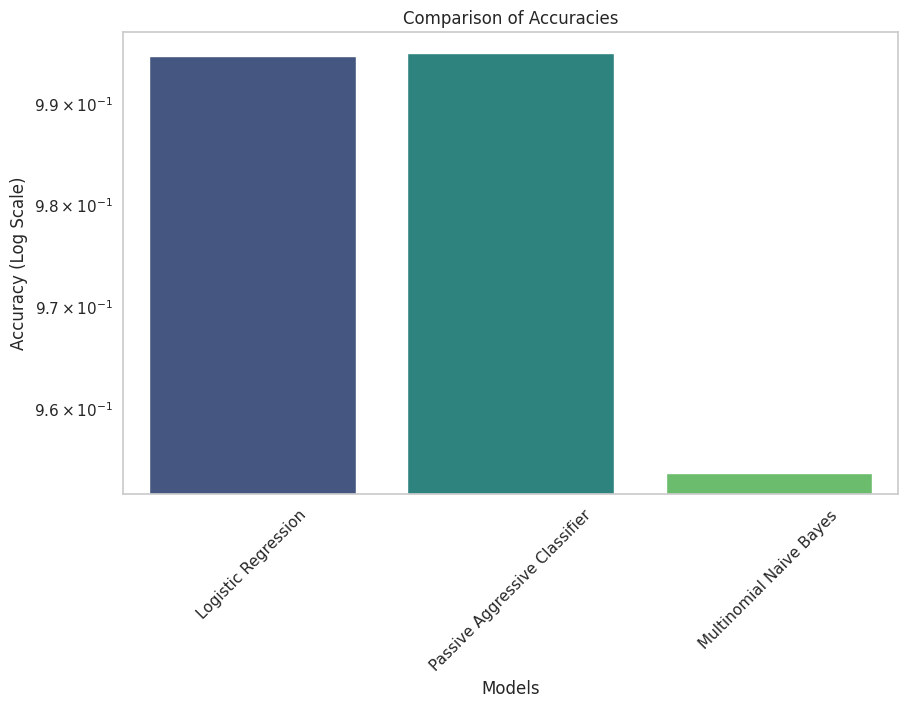

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score # Import accuracy_score here
from matplotlib.ticker import FormatStrFormatter, FuncFormatter # Import FuncFormatter
import numpy as np # Import numpy for log scale

# Transform mean_accuracies into lists to plot
models = list(mean_accuracies.keys())
accuracies = list(mean_accuracies.values())

# Plot with seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.yscale('log') # Ripristina l'asse y su scala logaritmica
sns.barplot(x=models, hue=models, y=accuracies, palette="viridis", legend =False)
plt.xlabel('Models')
plt.ylabel('Accuracy (Log Scale)')
plt.title('Comparison of Accuracies')
plt.xticks(rotation=45)

plt.show()